In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\Machine Learning\K means Cluster\Mall_Customers.csv",header = 0,index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
print(df.shape)
print(df.info())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


In [5]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
X=df.values[:,[2,3]]
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

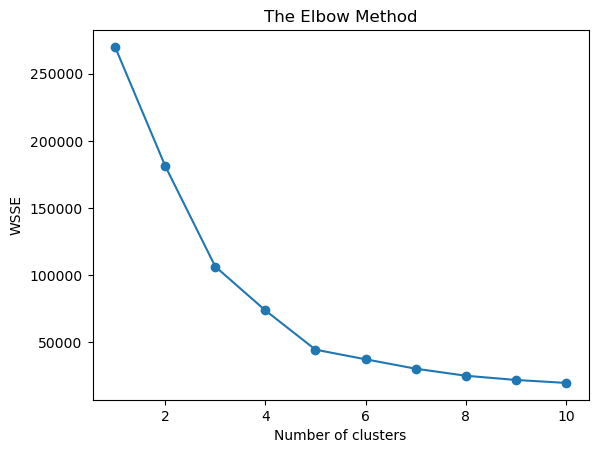

In [7]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
plt.scatter(range(1, 11),wsse) ### dot dot lagane ke liyeeee ( 1,2,3,4,5,6,7,8,9,10) me bari bari se dot 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()


In [8]:
print(wsse)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37271.88623658949, 30273.394312070042, 25022.485004530354, 21881.878507060967, 19669.71099830122]


In [9]:
### fitting k means to the dataset
kmeans = KMeans(n_clusters = 5,  random_state = 10)
Y_pred=kmeans.fit_predict(X)

# kmeans.fit(X)------->  training
# Y_pred=kmeans.fit_predict(X)-------> predicting


In [10]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [11]:
kmeans.inertia_    ### wsse vale code se se 5th value degaaaa 

44448.45544793371

In [12]:
kmeans.n_iter_ ## kitna cluster hua h back me vo batayega 

5

In [13]:
df["clusters"]=Y_pred   ## unlabelled to labeled data convert and clustring this 
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


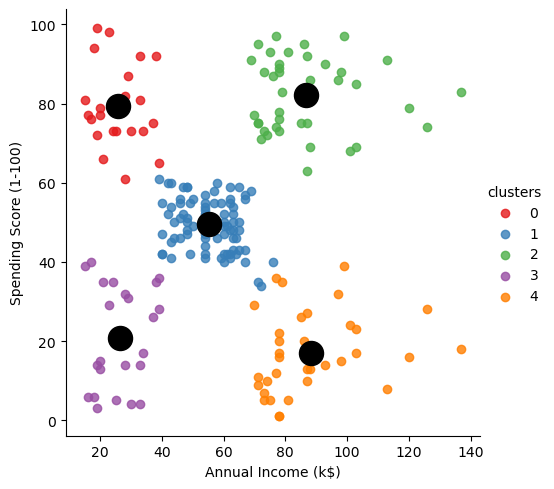

In [14]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='clusters',palette="Set1")  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
s = 300, c = 'black')
plt.show()

In [15]:
kmeans.n_clusters

5

In [16]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [17]:
df["cluster"]=df.clusters.replace({0:"Careless",1:"Standard ",2:"Target",3:"Sensible",4:"Careful"})

In [18]:
## pd.set_option("display.max_rows",none)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,cluster
CustomerID,,,,,,
1,Male,19,15,39,3,Sensible
2,Male,21,15,81,0,Careless
3,Female,20,16,6,3,Sensible
4,Female,23,16,77,0,Careless
5,Female,31,17,40,3,Sensible


In [24]:
new_df=df[df["cluster"]=="Target"]

In [25]:
new_df.shape

(39, 6)

In [26]:
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,cluster
CustomerID,,,,,,
124,Male,39,69,91,2,Target
126,Female,31,70,77,2,Target
128,Male,40,71,95,2,Target
130,Male,38,71,75,2,Target
132,Male,39,71,75,2,Target
134,Female,31,72,71,2,Target
136,Female,29,73,88,2,Target
138,Male,32,73,73,2,Target
140,Female,35,74,72,2,Target


In [27]:
new_df.to_excel(r"TargetCustomers.xlsx",index=True)

In [1]:
import os
os.getcwd()

'C:\\Users\\ASUS\\Desktop\\Machine Learning\\K means Cluster'